In [1]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [10]:
# Lendo datasets

all_dogs = pd.read_csv('datasets/allDogDescriptions.csv', sep=',', encoding='utf-8')
dogs_travel = pd.read_csv('datasets/dogTravel.csv',  sep=',', encoding='utf-8')
moves_location = pd.read_csv('datasets/movesByLocation.csv', sep=',', encoding='utf-8')



### Informações dos Datasets

In [11]:
all_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58180 entries, 0 to 58179
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            58180 non-null  int64  
 1   id               58180 non-null  int64  
 2   org_id           58180 non-null  object 
 3   url              58180 non-null  object 
 4   type.x           58180 non-null  object 
 5   species          58180 non-null  object 
 6   breed_primary    58180 non-null  object 
 7   breed_secondary  20821 non-null  object 
 8   breed_mixed      58180 non-null  bool   
 9   breed_unknown    58180 non-null  bool   
 10  color_primary    26134 non-null  object 
 11  color_secondary  12059 non-null  object 
 12  color_tertiary   1217 non-null   object 
 13  age              58180 non-null  object 
 14  sex              58180 non-null  object 
 15  size             58180 non-null  object 
 16  coat             27185 non-null  object 
 17  fixed       

In [12]:
dogs_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          6194 non-null   int64 
 1   id             6194 non-null   int64 
 2   contact_city   6194 non-null   object
 3   contact_state  6194 non-null   object
 4   description    6194 non-null   object
 5   found          6194 non-null   object
 6   manual         2147 non-null   object
 7   remove         1738 non-null   object
 8   still_there    319 non-null    object
dtypes: int64(2), object(7)
memory usage: 435.6+ KB


In [13]:
moves_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     90 non-null     int64  
 1   location  90 non-null     object 
 2   exported  81 non-null     float64
 3   imported  38 non-null     float64
 4   total     51 non-null     float64
 5   inUS      90 non-null     bool   
dtypes: bool(1), float64(3), int64(1), object(1)
memory usage: 3.7+ KB


In [14]:
# Valores Nulos
all_dogs.isnull().sum()

index                  0
id                     0
org_id                 0
url                    0
type.x                 0
species                0
breed_primary          0
breed_secondary    37359
breed_mixed            0
breed_unknown          0
color_primary      32046
color_secondary    46121
color_tertiary     56963
age                    0
sex                    0
size                   0
coat               30995
fixed                  0
house_trained          0
declawed           58180
special_needs          0
shots_current          0
env_children       30153
env_dogs           23511
env_cats           38828
name                   0
status                 0
posted                 0
contact_city           0
contact_state          0
contact_zip           12
contact_country        0
stateQ                 0
accessed              33
type.y               640
description         8705
dtype: int64

In [15]:
all_dogs.head()

,index,id,org_id,url,type.x,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,...,status,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description
0,0,46042150,NV163,https://www.petfinder.com/dog/harley-46042150/...,Dog,Dog,American Staffordshire Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:37:59+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,Harley is not sure how he wound up at shelter ...
1,1,46042002,NV163,https://www.petfinder.com/dog/biggie-46042002/...,Dog,Dog,Pit Bull Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:24:57+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,6 year old Biggie has lost his home and really...
2,2,46040898,NV99,https://www.petfinder.com/dog/ziggy-46040898/n...,Dog,Dog,Shepherd,NaN,False,False,...,adoptable,2019-09-20T14:10:11+0000,Mesquite,NV,89027,US,89009,2019-09-20,Dog,Approx 2 years old.\n Did I catch your eye? I ...
3,3,46039877,NV202,https://www.petfinder.com/dog/gypsy-46039877/n...,Dog,Dog,German Shepherd Dog,NaN,False,False,...,adoptable,2019-09-20T10:08:22+0000,Pahrump,NV,89048,US,89009,2019-09-20,Dog,NaN
4,4,46039306,NV184,https://www.petfinder.com/dog/theo-46039306/nv...,Dog,Dog,Dachshund,NaN,False,False,...,adoptable,2019-09-20T06:48:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Theo is a friendly dachshund mix who gets alon...


In [16]:
all_dogs.tail()

,index,id,org_id,url,type.x,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,...,status,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description
58175,58175,44605893,WY20,https://www.petfinder.com/dog/tren-44605893/wy...,Dog,Dog,Border Collie,NaN,False,False,...,adoptable,2019-05-03T14:23:49+0000,Lander,WY,82520,US,WY,2019-09-20,Dog,"Due to the small size of our volunteer base, w..."
58176,58176,44457061,WY24,https://www.petfinder.com/dog/harley-44457061/...,Dog,Dog,Australian Shepherd,Australian Cattle Dog / Blue Heeler,True,False,...,adoptable,2019-04-13T16:20:24+0000,Riverton,WY,82501,US,WY,2019-09-20,Dog,NaN
58177,58177,42865848,WY20,https://www.petfinder.com/dog/echo-42865848/wy...,Dog,Dog,Border Collie,NaN,False,False,...,adoptable,2018-09-27T04:18:56+0000,Glenrock,WY,82637,US,WY,2019-09-20,Dog,"Due to the small size of our volunteer base, w..."
58178,58178,42734734,WY24,https://www.petfinder.com/dog/simon-42734734/w...,Dog,Dog,Boxer,Mixed Breed,True,False,...,adoptable,2018-09-12T05:03:38+0000,Riverton,WY,82501,US,WY,2019-09-20,Dog,NaN
58179,58179,42663515,WY24,https://www.petfinder.com/dog/romeo-42663515/w...,Dog,Dog,Labrador Retriever,Pit Bull Terrier,True,False,...,adoptable,2018-09-03T20:42:24+0000,Riverton,WY,82501,US,WY,2019-09-20,Dog,NaN


In [24]:
all_dogs.groupby(by=['breed_primary']).sum()

,index,id,breed_mixed,breed_unknown,fixed,house_trained,declawed,special_needs,shots_current
breed_primary,,,,,,,,,
Affenpinscher,625585,743880933,5,0,11,3,0.0,1,12
Afghan Hound,97953,166210845,4,0,4,4,0.0,0,3
Airedale Terrier,407785,824977820,17,0,14,4,0.0,3,12
Akbash,109236,136569594,2,0,3,2,0.0,0,3
Akita,5743545,7916667829,83,0,147,113,0.0,7,147
...,...,...,...,...,...,...,...,...,...
Wirehaired Pointing Griffon,19781,35529082,1,0,1,0,0.0,0,1
Wirehaired Terrier,1394671,2658358202,45,0,51,22,0.0,0,53
Xoloitzcuintli / Mexican Hairless,252636,450413797,5,0,11,8,0.0,1,10


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

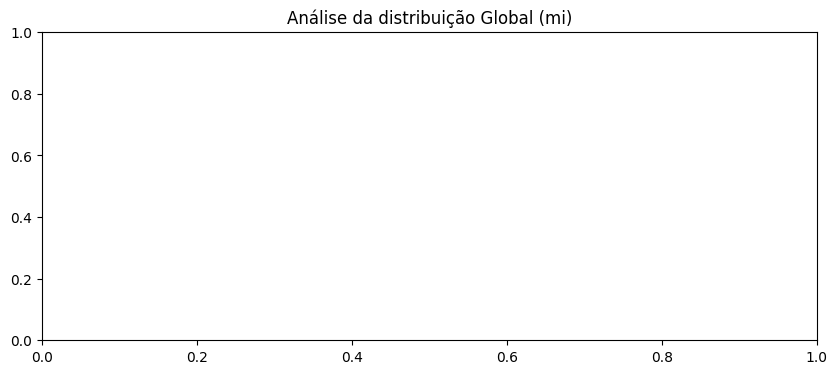

In [28]:
# Tamanho
plt.figure( figsize=(10, 4) )

# titulo
plt.title('Análise da distribuição Global (mi)')

# Plot
sns.boxplot( data=all_dogs, x='breed_mixed', y='posted') ;